In [2]:
import pandas as pd
import seaborn as sns
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
from mysql.connector import errorcode
from sklearn.cluster import KMeans

In [3]:
import array
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

In [4]:
pd.set_option('display.max_columns', None)

In [37]:
config = {
  'host':'elecsimresults2.mysql.database.azure.com',
  'user':'alexkell@elecsimresults2',
  'password':'b3rz0s4m4dr1dth3h01113s!',
  'database':'carbonoptimiser',
  'ssl_ca':'/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/validation-optimisation/database/BaltimoreCyberTrustRoot.crt.pem'
}

# conn = mysql.connector.connect(**config)


try:
    conn = mysql.connector.connect(**config)
    print("Connection established")
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with the user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
else:
    cursor = conn.cursor()

Connection established
Connection established


In [9]:
ga_results = pd.read_sql('SELECT * FROM carbon_results_function', con=conn)
ga_results['run_number'] = np.repeat([1,2,3,4,5,6,7,8],80)

ga_results

,id,average_electricity_price,carbon_emitted,attr_function,attr_m,attr_c,attr_a,attr_d,run_number
0,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1
1,2,3.455570,0.0,1.0,9.273293,222.611679,-5.329590,12.956666,1
2,3,3.544634,0.0,1.0,2.294460,170.640274,6.567950,3.051510,1
3,4,3.642749,0.0,1.0,7.827714,138.327347,-6.872702,6.064339,1
4,5,3.706068,0.0,0.0,-5.504350,28.775219,1.812898,13.146162,1
...,...,...,...,...,...,...,...,...,...
635,636,6.993787,0.0,0.0,9.431419,219.818726,0.000000,0.000000,8
636,637,7.031917,0.0,0.0,3.733708,67.842010,0.000000,0.000000,8
637,638,7.082546,0.0,0.0,11.303436,208.162491,0.000000,0.000000,8
638,639,7.094190,0.0,0.0,1.263724,70.854759,0.000000,0.000000,8


,id,average_electricity_price,carbon_emitted,attr_function,attr_m,attr_c,attr_a,attr_d,run_number
0,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1
1,2,3.455570,0.0,1.0,9.273293,222.611679,-5.329590,12.956666,1
2,3,3.544634,0.0,1.0,2.294460,170.640274,6.567950,3.051510,1
3,4,3.642749,0.0,1.0,7.827714,138.327347,-6.872702,6.064339,1
4,5,3.706068,0.0,0.0,-5.504350,28.775219,1.812898,13.146162,1
...,...,...,...,...,...,...,...,...,...
635,636,6.993787,0.0,0.0,9.431419,219.818726,0.000000,0.000000,8
636,637,7.031917,0.0,0.0,3.733708,67.842010,0.000000,0.000000,8
637,638,7.082546,0.0,0.0,11.303436,208.162491,0.000000,0.000000,8
638,639,7.094190,0.0,0.0,1.263724,70.854759,0.000000,0.000000,8


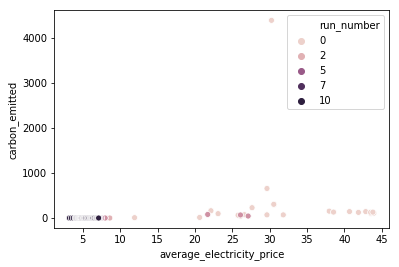

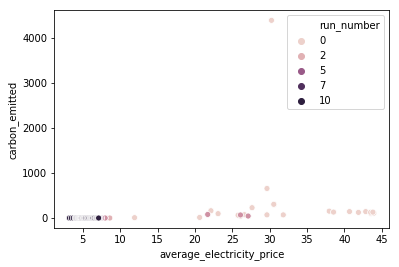

In [10]:
sns.scatterplot(data=ga_results, x='average_electricity_price',  y='carbon_emitted', hue='run_number')

In [11]:
less_than_5 = ga_results[ga_results.average_electricity_price < 5]
less_than_5.head()

,id,average_electricity_price,carbon_emitted,attr_function,attr_m,attr_c,attr_a,attr_d,run_number
0,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1
1,2,3.455570,0.0,1.0,9.273293,222.611679,-5.329590,12.956666,1
2,3,3.544634,0.0,1.0,2.294460,170.640274,6.567950,3.051510,1
3,4,3.642749,0.0,1.0,7.827714,138.327347,-6.872702,6.064339,1
4,5,3.706068,0.0,0.0,-5.504350,28.775219,1.812898,13.146162,1


,id,average_electricity_price,carbon_emitted,attr_function,attr_m,attr_c,attr_a,attr_d,run_number
0,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1
1,2,3.455570,0.0,1.0,9.273293,222.611679,-5.329590,12.956666,1
2,3,3.544634,0.0,1.0,2.294460,170.640274,6.567950,3.051510,1
3,4,3.642749,0.0,1.0,7.827714,138.327347,-6.872702,6.064339,1
4,5,3.706068,0.0,0.0,-5.504350,28.775219,1.812898,13.146162,1


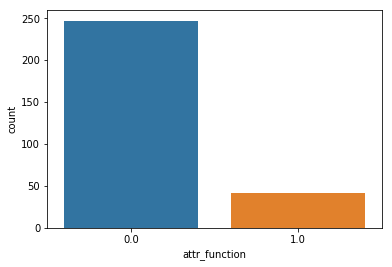

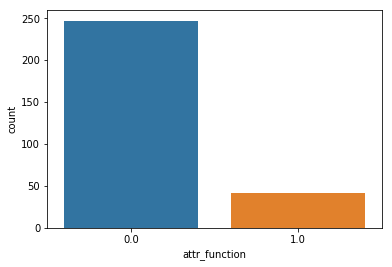

In [12]:
sns.countplot(data=less_than_5, x='attr_function')

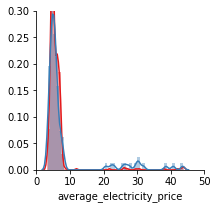

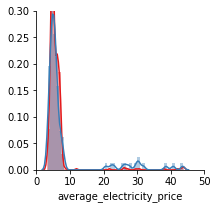

In [13]:
g = sns.FacetGrid(ga_results, hue="attr_function", palette="Set1")
g = (g.map(sns.distplot, "average_electricity_price"))
g.set(ylim=(0, 0.3), xlim=(0,50))

In [14]:
def get_linear_points(m, c, x_range_max):
    x = np.linspace(0, x_range_max, 50)
    y = m*x+c
    return x, y

def get_log_points(c, a, d, x_range_max):
    x = np.linspace(0, x_range_max, 50)
    y = a*x ** d + c
    return x, y

# def to_long_df(x, y)
    
def select_function(dat):
    if dat['attr_function'] == 1:
        return get_log_points(dat['attr_c'], dat['attr_a'], dat['attr_d'], 18)
    else:
        return get_linear_points(dat['attr_m'], dat['attr_c'], 18)

In [15]:
results_with_lines = ga_results.copy()
results_with_lines[['x','y']] = ga_results.apply(lambda x: select_function(x), axis=1, result_type='expand')
results_with_lines

,id,average_electricity_price,carbon_emitted,attr_function,attr_m,attr_c,attr_a,attr_d,run_number,x,y
0,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[238.11575317382812, 238.1155428185266, 237.83..."
1,2,3.455570,0.0,1.0,9.273293,222.611679,-5.329590,12.956666,1,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[222.61167907714844, 222.61166673091927, 222.5..."
2,3,3.544634,0.0,1.0,2.294460,170.640274,6.567950,3.051510,1,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[170.64027404785156, 170.94948593029773, 173.2..."
3,4,3.642749,0.0,1.0,7.827714,138.327347,-6.872702,6.064339,1,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[138.3273468017578, 138.3115123356989, 137.267..."
4,5,3.706068,0.0,0.0,-5.504350,28.775219,1.812898,13.146162,1,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[28.775218963623047, 26.753212773070043, 24.73..."
...,...,...,...,...,...,...,...,...,...,...,...
635,636,6.993787,0.0,0.0,9.431419,219.818726,0.000000,0.000000,8,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[219.8187255859375, 223.28332862075493, 226.74..."
636,637,7.031917,0.0,0.0,3.733708,67.842010,0.000000,0.000000,8,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[67.84201049804688, 69.21357666716284, 70.5851..."
637,638,7.082546,0.0,0.0,11.303436,208.162491,0.000000,0.000000,8,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[208.16249084472656, 212.3147735595703, 216.46..."
638,639,7.094190,0.0,0.0,1.263724,70.854759,0.000000,0.000000,8,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[70.8547592163086, 71.31898430415562, 71.78320..."


,id,average_electricity_price,carbon_emitted,attr_function,attr_m,attr_c,attr_a,attr_d,run_number,x,y
0,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[238.11575317382812, 238.1155428185266, 237.83..."
1,2,3.455570,0.0,1.0,9.273293,222.611679,-5.329590,12.956666,1,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[222.61167907714844, 222.61166673091927, 222.5..."
2,3,3.544634,0.0,1.0,2.294460,170.640274,6.567950,3.051510,1,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[170.64027404785156, 170.94948593029773, 173.2..."
3,4,3.642749,0.0,1.0,7.827714,138.327347,-6.872702,6.064339,1,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[138.3273468017578, 138.3115123356989, 137.267..."
4,5,3.706068,0.0,0.0,-5.504350,28.775219,1.812898,13.146162,1,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[28.775218963623047, 26.753212773070043, 24.73..."
...,...,...,...,...,...,...,...,...,...,...,...
635,636,6.993787,0.0,0.0,9.431419,219.818726,0.000000,0.000000,8,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[219.8187255859375, 223.28332862075493, 226.74..."
636,637,7.031917,0.0,0.0,3.733708,67.842010,0.000000,0.000000,8,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[67.84201049804688, 69.21357666716284, 70.5851..."
637,638,7.082546,0.0,0.0,11.303436,208.162491,0.000000,0.000000,8,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[208.16249084472656, 212.3147735595703, 216.46..."
638,639,7.094190,0.0,0.0,1.263724,70.854759,0.000000,0.000000,8,"[0.0, 0.3673469387755102, 0.7346938775510204, ...","[70.8547592163086, 71.31898430415562, 71.78320..."


In [16]:
# results_with_lines = results_with_lines.explode('x').explode('y').drop_duplicates(subset=results_with_lines.columns[:-1])
# results_with_lines.dtypes
# results_with_lines.head()

# results_with_lines.set_index().apply(pd.Series.explode).reset_index()


def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

results_with_lines_exploded = explode(results_with_lines, ['x','y'])


In [17]:
results_with_lines_exploded

,id,average_electricity_price,carbon_emitted,attr_function,attr_m,attr_c,attr_a,attr_d,run_number,x,y
0,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1,0.000000,238.115753
1,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1,0.367347,238.115543
2,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1,0.734694,237.836021
3,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1,1.102041,219.320767
4,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1,1.469388,-133.874557
...,...,...,...,...,...,...,...,...,...,...,...
31995,640,7.112801,0.0,0.0,6.314853,171.365845,0.000000,0.000000,8,16.530612,275.754234
31996,640,7.112801,0.0,0.0,6.314853,171.365845,0.000000,0.000000,8,16.897959,278.073976
31997,640,7.112801,0.0,0.0,6.314853,171.365845,0.000000,0.000000,8,17.265306,280.393718
31998,640,7.112801,0.0,0.0,6.314853,171.365845,0.000000,0.000000,8,17.632653,282.713460


,id,average_electricity_price,carbon_emitted,attr_function,attr_m,attr_c,attr_a,attr_d,run_number,x,y
0,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1,0.000000,238.115753
1,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1,0.367347,238.115543
2,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1,0.734694,237.836021
3,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1,1.102041,219.320767
4,1,3.454978,0.0,1.0,-6.677182,238.115753,-6.857354,10.377003,1,1.469388,-133.874557
...,...,...,...,...,...,...,...,...,...,...,...
31995,640,7.112801,0.0,0.0,6.314853,171.365845,0.000000,0.000000,8,16.530612,275.754234
31996,640,7.112801,0.0,0.0,6.314853,171.365845,0.000000,0.000000,8,16.897959,278.073976
31997,640,7.112801,0.0,0.0,6.314853,171.365845,0.000000,0.000000,8,17.265306,280.393718
31998,640,7.112801,0.0,0.0,6.314853,171.365845,0.000000,0.000000,8,17.632653,282.713460


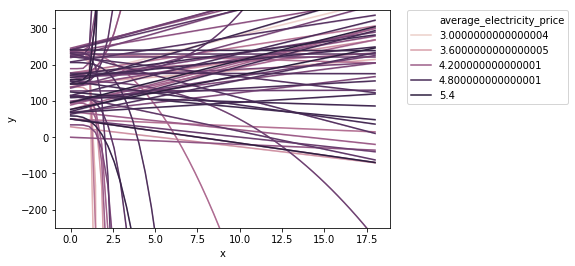

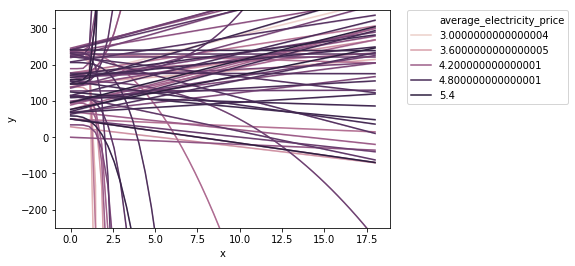

In [18]:
g = sns.lineplot(data=results_with_lines_exploded[results_with_lines_exploded.average_electricity_price<5], x='x', y='y', hue='average_electricity_price')
# g = sns.lineplot(data=results_with_lines_exploded, x='x', y='y', hue='average_electricity_price')
g.set(ylim=(-250, 350))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



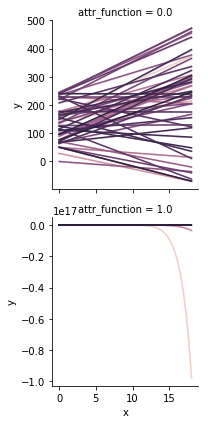

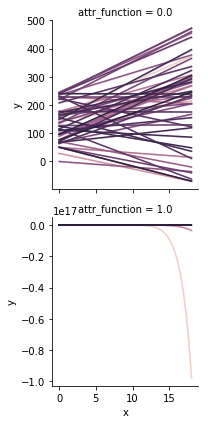

In [19]:
g = sns.FacetGrid(results_with_lines_exploded[results_with_lines_exploded.average_electricity_price<5], row='attr_function', sharey=False)
g = g.map(sns.lineplot, 'x', 'y', 'average_electricity_price')



In [20]:
# for a in range(-100,100):
#     for b in range(-100,100):
#         for c in range(0,250):
#             res = a*18**b+c
            
            
# a = np.linspace(-5,5, num = 300).tolist()
# b = np.linspace(-1,5, num = 300).tolist()
# c = np.linspace(0,250, num = 300).tolist()

a = np.linspace(1.0,2.65, num = 300).tolist()
b = np.linspace(0,1, num = 300).tolist()
c = np.linspace(0,125, num = 300).tolist()

# 1.0, 2.6505167705463295, 0.0, 1.0, 125.5667309153067

# len(np.outer(np.outer(a,b).ravel(),c).ravel())

In [21]:
# df = pd.DataFrame(np.outer(ser2, ser1), index = ser2.index, columns = ser1.index)

In [22]:
index = pd.MultiIndex.from_product([a, b, c], names = ["a", "b", "c"])

cartesian_product = pd.DataFrame(index = index).reset_index()
cartesian_product

,a,b,c
0,1.00,0.0,0.000000
1,1.00,0.0,0.418060
2,1.00,0.0,0.836120
3,1.00,0.0,1.254181
4,1.00,0.0,1.672241
...,...,...,...
26999995,2.65,1.0,123.327759
26999996,2.65,1.0,123.745819
26999997,2.65,1.0,124.163880
26999998,2.65,1.0,124.581940


,a,b,c
0,1.00,0.0,0.000000
1,1.00,0.0,0.418060
2,1.00,0.0,0.836120
3,1.00,0.0,1.254181
4,1.00,0.0,1.672241
...,...,...,...
26999995,2.65,1.0,123.327759
26999996,2.65,1.0,123.745819
26999997,2.65,1.0,124.163880
26999998,2.65,1.0,124.581940


In [23]:
for i in range(19):
    cartesian_product['res_{}'.format(i)] = cartesian_product['a']*i**cartesian_product['b']+cartesian_product['c']
cartesian_product

,a,b,c,res_0,res_1,res_2,res_3,res_4,res_5,res_6,res_7,res_8,res_9,res_10,res_11,res_12,res_13,res_14,res_15,res_16,res_17,res_18
0,1.00,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.00,0.0,0.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060
2,1.00,0.0,0.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120
3,1.00,0.0,1.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181
4,1.00,0.0,1.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26999995,2.65,1.0,123.327759,123.327759,125.977759,128.627759,131.277759,133.927759,136.577759,139.227759,141.877759,144.527759,147.177759,149.827759,152.477759,155.127759,157.777759,160.427759,163.077759,165.727759,168.377759,171.027759
26999996,2.65,1.0,123.745819,123.745819,126.395819,129.045819,131.695819,134.345819,136.995819,139.645819,142.295819,144.945819,147.595819,150.245819,152.895819,155.545819,158.195819,160.845819,163.495819,166.145819,168.795819,171.445819
26999997,2.65,1.0,124.163880,124.163880,126.813880,129.463880,132.113880,134.763880,137.413880,140.063880,142.713880,145.363880,148.013880,150.663880,153.313880,155.963880,158.613880,161.263880,163.913880,166.563880,169.213880,171.863880
26999998,2.65,1.0,124.581940,124.581940,127.231940,129.881940,132.531940,135.181940,137.831940,140.481940,143.131940,145.781940,148.431940,151.081940,153.731940,156.381940,159.031940,161.681940,164.331940,166.981940,169.631940,172.281940


,a,b,c,res_0,res_1,res_2,res_3,res_4,res_5,res_6,res_7,res_8,res_9,res_10,res_11,res_12,res_13,res_14,res_15,res_16,res_17,res_18
0,1.00,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.00,0.0,0.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060,1.418060
2,1.00,0.0,0.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120,1.836120
3,1.00,0.0,1.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181,2.254181
4,1.00,0.0,1.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241,2.672241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26999995,2.65,1.0,123.327759,123.327759,125.977759,128.627759,131.277759,133.927759,136.577759,139.227759,141.877759,144.527759,147.177759,149.827759,152.477759,155.127759,157.777759,160.427759,163.077759,165.727759,168.377759,171.027759
26999996,2.65,1.0,123.745819,123.745819,126.395819,129.045819,131.695819,134.345819,136.995819,139.645819,142.295819,144.945819,147.595819,150.245819,152.895819,155.545819,158.195819,160.845819,163.495819,166.145819,168.795819,171.445819
26999997,2.65,1.0,124.163880,124.163880,126.813880,129.463880,132.113880,134.763880,137.413880,140.063880,142.713880,145.363880,148.013880,150.663880,153.313880,155.963880,158.613880,161.263880,163.913880,166.563880,169.213880,171.863880
26999998,2.65,1.0,124.581940,124.581940,127.231940,129.881940,132.531940,135.181940,137.831940,140.481940,143.131940,145.781940,148.431940,151.081940,153.731940,156.381940,159.031940,161.681940,164.331940,166.981940,169.631940,172.281940


In [24]:
# def get_point_on_curve(dat, num):
#     results = []
#     for number in range(num):
#         res = dat['a']*number**dat['b']+dat['c']
#         results.append(res)
        
#     return pd.Series(results)
        

# cartesian_product[["res_{}".format(i) for i in range(19)]] = cartesian_product.apply(lambda x: get_point_on_curve(x, 19), axis=1)


In [25]:
query_string = " ".join(["res_{} < 250 and res_{} > 0 and".format(i,i) for i in range(19)])[:-4]

# cartesian_product.query("res_0 < 250 and res_1 < 250")
within_range = cartesian_product.query(query_string)



In [26]:
len(within_range)/len(cartesian_product)

0.9966777777777778

0.9966777777777778

In [27]:
# within_range = cartesian_product[(cartesian_product.result>0) & (cartesian_product.result<250)]
# within_range

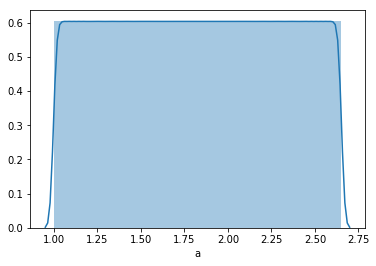

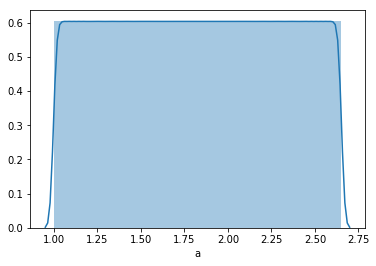

In [28]:
sns.distplot(within_range['a'])

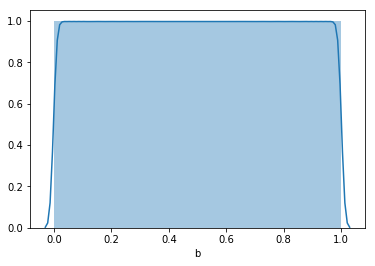

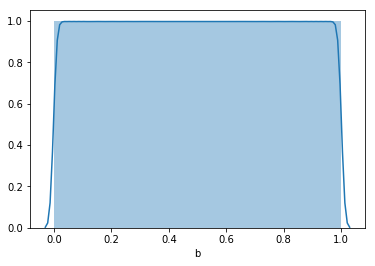

In [29]:
sns.distplot(within_range['b'])

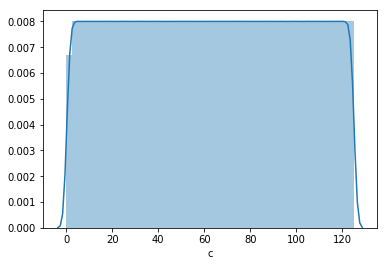

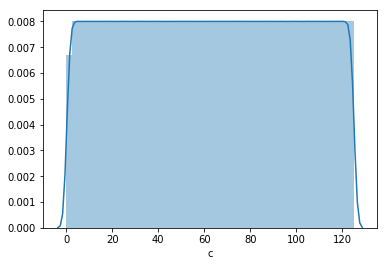

In [30]:
sns.distplot(within_range['c'])

In [31]:
def optimise_params(individual):
    a = np.linspace(individual[0],individual[1], num = 100).tolist()
    b = np.linspace(individual[2],individual[3], num = 100).tolist()
    c = np.linspace(0,individual[4], num = 100).tolist()

    index = pd.MultiIndex.from_product([a, b, c], names = ["a", "b", "c"])

    cartesian_product = pd.DataFrame(index = index).reset_index()
    cartesian_product

    for i in range(19):
        cartesian_product['res_{}'.format(i)] = cartesian_product['a']*i**cartesian_product['b']+cartesian_product['c']
    cartesian_product

    query_string = " ".join(["res_{} < 250 and res_{} > 0 and".format(i,i) for i in range(19)])[:-4]

    # cartesian_product.query("res_0 < 250 and res_1 < 250")
    within_range = cartesian_product.query(query_string)
    
    return len(within_range)/len(cartesian_product),




In [32]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='d', fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_a", random.uniform, -5, 0)
toolbox.register("attr_b", random.uniform, -5, -0.1)
toolbox.register("attr_c", random.uniform, 0, 250)
toolbox.register("attr_a1", random.uniform, 0, 5)
toolbox.register("attr_b1", random.uniform, 0.1, 5)

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_a, toolbox.attr_a1, toolbox.attr_b, toolbox.attr_b1, toolbox.attr_c),n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", optimise_params)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

def main():
#     random.seed(64)
    
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    return pop, log, hof


main()

gen	nevals	avg     	std     	min    	max     
0  	50    	0.254219	0.112353	0.03933	0.623618
gen	nevals	avg     	std     	min    	max     
0  	50    	0.254219	0.112353	0.03933	0.623618
1  	30    	0.344578	0.148219	0.009901	0.783973
1  	30    	0.344578	0.148219	0.009901	0.783973
2  	24    	0.449269	0.191546	0       	0.922922
2  	24    	0.449269	0.191546	0       	0.922922
3  	30    	0.601541	0.210752	0       	0.922922
3  	30    	0.601541	0.210752	0       	0.922922
4  	23    	0.720258	0.168013	0.009999	0.985   
4  	23    	0.720258	0.168013	0.009999	0.985   
5  	25    	0.806307	0.152983	0.00985 	0.9928  
5  	25    	0.806307	0.152983	0.00985 	0.9928  
6  	25    	0.897168	0.170989	0.0046  	0.9936  
6  	25    	0.897168	0.170989	0.0046  	0.9936  
7  	37    	0.952397	0.140879	0       	0.995   
7  	37    	0.952397	0.140879	0       	0.995   
8  	31    	0.986782	0.0145081	0.909122	0.995   
8  	31    	0.986782	0.0145081	0.909122	0.995   
9  	19    	0.985282	0.0550878	0.6     	0.9955  
9  	19    	0.9

([array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 1.0]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 1.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [0.0, 3.4251746441137874, 0.0, 1.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.

([array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 1.0]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 1.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [0.0, 3.4251746441137874, 0.0, 1.0, 198.39463544547306]),
  array('d', [1.0, 3.4251746441137874, 0.0, 0.0, 198.39463544547306]),
  array('d', [1.0, 3.

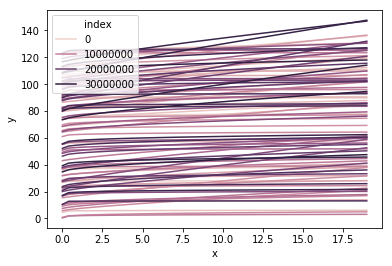

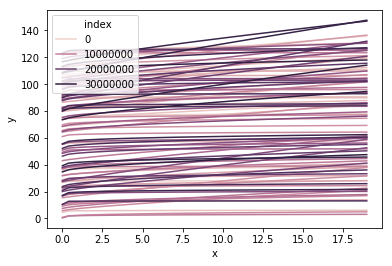

In [33]:
optimised_params = cartesian_product.sample(100).copy()
optimised_params[['x','y']]=optimised_params.apply(lambda x: get_log_points(x['c'], x['a'], x['b'],19), axis=1, result_type='expand')
optimised_params = optimised_params.reset_index()
optimised_params_exploded = explode(optimised_params, ['x','y'])
optimised_params_exploded.head()
sns.lineplot(data=optimised_params_exploded, x='x', y='y',hue='index')

In [38]:
ga_results = pd.read_sql('SELECT * FROM carbon_results_function', con=conn)
# ga_results['run_number'] = np.repeat([1,2],80)
ga_linear = ga_results[ga_results.id > 160]
ga_linear

,id,average_electricity_price,carbon_emitted,attr_function,attr_m,attr_c,attr_a,attr_d
160,161,3.208273,0.0,0.0,11.538894,165.928391,0.0,0.0
161,162,3.457054,0.0,0.0,3.733708,147.485443,0.0,0.0
162,163,3.719826,0.0,0.0,7.163467,139.397690,0.0,0.0
163,164,3.977280,0.0,0.0,7.209994,177.184814,0.0,0.0
164,165,4.016092,0.0,0.0,-1.381029,229.915146,0.0,0.0
...,...,...,...,...,...,...,...,...
635,636,6.993787,0.0,0.0,9.431419,219.818726,0.0,0.0
636,637,7.031917,0.0,0.0,3.733708,67.842010,0.0,0.0
637,638,7.082546,0.0,0.0,11.303436,208.162491,0.0,0.0
638,639,7.094190,0.0,0.0,1.263724,70.854759,0.0,0.0


,id,average_electricity_price,carbon_emitted,attr_function,attr_m,attr_c,attr_a,attr_d
160,161,3.208273,0.0,0.0,11.538894,165.928391,0.0,0.0
161,162,3.457054,0.0,0.0,3.733708,147.485443,0.0,0.0
162,163,3.719826,0.0,0.0,7.163467,139.397690,0.0,0.0
163,164,3.977280,0.0,0.0,7.209994,177.184814,0.0,0.0
164,165,4.016092,0.0,0.0,-1.381029,229.915146,0.0,0.0
...,...,...,...,...,...,...,...,...
635,636,6.993787,0.0,0.0,9.431419,219.818726,0.0,0.0
636,637,7.031917,0.0,0.0,3.733708,67.842010,0.0,0.0
637,638,7.082546,0.0,0.0,11.303436,208.162491,0.0,0.0
638,639,7.094190,0.0,0.0,1.263724,70.854759,0.0,0.0


In [39]:
ga_linear['run_number'] = np.repeat([1,2,3,4,5,6],80)
ga_linear

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,average_electricity_price,carbon_emitted,attr_function,attr_m,attr_c,attr_a,attr_d,run_number
160,161,3.208273,0.0,0.0,11.538894,165.928391,0.0,0.0,1
161,162,3.457054,0.0,0.0,3.733708,147.485443,0.0,0.0,1
162,163,3.719826,0.0,0.0,7.163467,139.397690,0.0,0.0,1
163,164,3.977280,0.0,0.0,7.209994,177.184814,0.0,0.0,1
164,165,4.016092,0.0,0.0,-1.381029,229.915146,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
635,636,6.993787,0.0,0.0,9.431419,219.818726,0.0,0.0,6
636,637,7.031917,0.0,0.0,3.733708,67.842010,0.0,0.0,6
637,638,7.082546,0.0,0.0,11.303436,208.162491,0.0,0.0,6
638,639,7.094190,0.0,0.0,1.263724,70.854759,0.0,0.0,6


/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,average_electricity_price,carbon_emitted,attr_function,attr_m,attr_c,attr_a,attr_d,run_number
160,161,3.208273,0.0,0.0,11.538894,165.928391,0.0,0.0,1
161,162,3.457054,0.0,0.0,3.733708,147.485443,0.0,0.0,1
162,163,3.719826,0.0,0.0,7.163467,139.397690,0.0,0.0,1
163,164,3.977280,0.0,0.0,7.209994,177.184814,0.0,0.0,1
164,165,4.016092,0.0,0.0,-1.381029,229.915146,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
635,636,6.993787,0.0,0.0,9.431419,219.818726,0.0,0.0,6
636,637,7.031917,0.0,0.0,3.733708,67.842010,0.0,0.0,6
637,638,7.082546,0.0,0.0,11.303436,208.162491,0.0,0.0,6
638,639,7.094190,0.0,0.0,1.263724,70.854759,0.0,0.0,6


In [44]:
ga_linear.to_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/data/optimisation_data/ga_linear.csv')



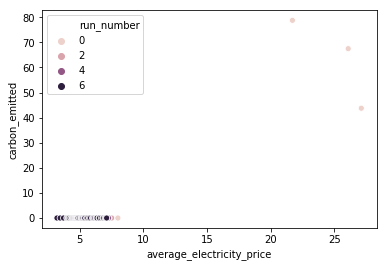

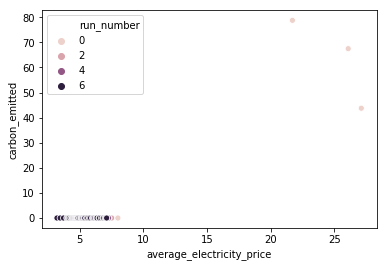

In [40]:
sns.scatterplot(data=ga_linear, x='average_electricity_price',  y='carbon_emitted', hue='run_number')

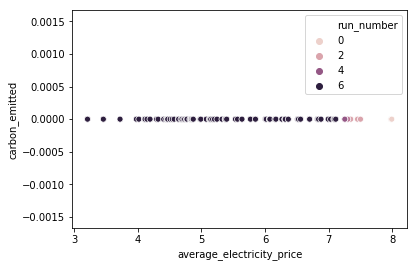

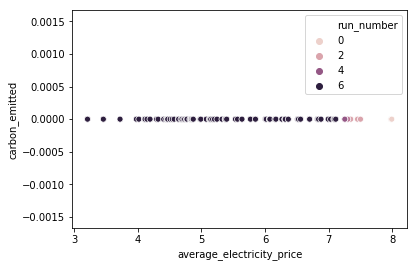

In [41]:
sns.scatterplot(data=ga_linear[ga_linear.average_electricity_price<9], x='average_electricity_price',  y='carbon_emitted', hue='run_number')

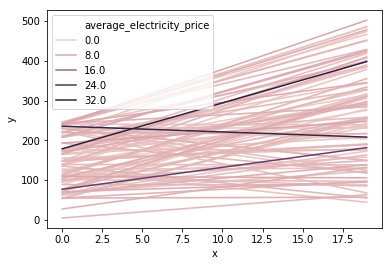

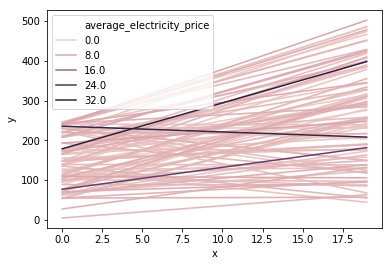

In [46]:
ga_linear_big = ga_linear#[(ga_linear.average_electricity_price<5)]
linear_data_big = ga_linear_big.copy()
linear_data_big[['x','y']]=linear_data_big.apply(lambda x: get_linear_points(x['attr_m'], x['attr_c'],19), axis=1, result_type='expand')
linear_data_big_exploded = linear_data_big.reset_index()
linear_data_big_exploded = explode(linear_data_big, ['x','y'])
linear_data_big_exploded.head()
sns.lineplot(data=linear_data_big_exploded, x='x', y='y',hue='average_electricity_price')

linear_data_big_exploded.to_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/data/optimisation_data/linear_data_big_exploded.csv')



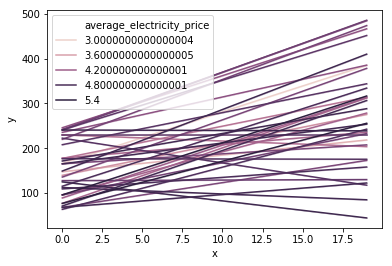

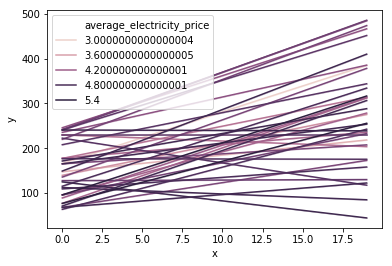

In [45]:
ga_linear_small = ga_linear#[(ga_linear.average_electricity_price<5)]
linear_data = ga_linear_small.copy()
linear_data[['x','y']]=linear_data.apply(lambda x: get_linear_points(x['attr_m'], x['attr_c'],19), axis=1, result_type='expand')
linear_data_exploded = linear_data.reset_index()
linear_data_exploded = explode(linear_data, ['x','y'])
linear_data_exploded.head()
sns.lineplot(data=linear_data_exploded, x='x', y='y',hue='average_electricity_price')

linear_data_exploded.to_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/data/optimisation_data/ga_linear_exploded.csv')



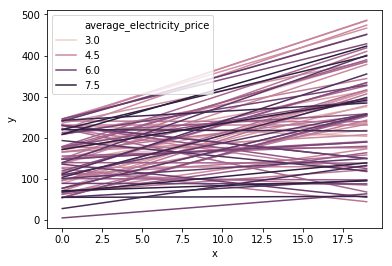

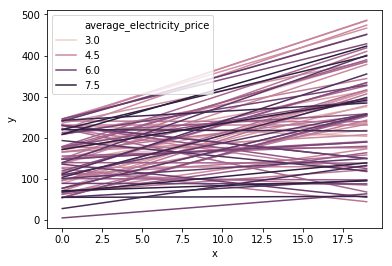

In [43]:
ga_linear_small = ga_linear[(ga_linear.run_number == 6)]
linear_data = ga_linear_small.copy()
linear_data[['x','y']]=linear_data.apply(lambda x: get_linear_points(x['attr_m'], x['attr_c'],19), axis=1, result_type='expand')
linear_data_exploded = linear_data.reset_index()
linear_data_exploded = explode(linear_data, ['x','y'])
linear_data_exploded.head()
sns.lineplot(data=linear_data_exploded, x='x', y='y',hue='average_electricity_price')

